# Workshop LR Petnica

## Important functions:
### Sigmoid function:

\begin{equation*}
S(x) = \frac{1}{1 + e^{-x}}
\end{equation*}

You can find more at *https://en.wikipedia.org/wiki/Sigmoid_function*

In [1]:
import numpy as np

def sigmoid(x):
    #Fill in sigmoid computation
    return 0

Usage example:

In [2]:
print(sigmoid(0))
testArray = np.array([1,5])
print(sigmoid(testArray))

0
0


Ploting sigmoid:

In [3]:
import matplotlib.pyplot as plt

x = np.arange(-10., 10., 0.2)
y = sigmoid(x)
plt.plot(x,y)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

### ReLu function:

\begin{equation*}
f(x)  = \begin{cases}
    x & \mbox{if } x > 0 \\
    0 & \mbox{otherwise}
\end{cases}
\end{equation*}

You can find more at *https://en.wikipedia.org/wiki/Rectifier_(neural_networks)*

In [70]:
def relu(x):
    # Fill in ReLu funcion
    return 0

In [71]:
print(relu(-5))
print(relu(5))
testArray = np.array([3,0,-1,2,5,-2])
print(relu(testArray))

0
5
[3 0 0 2 5 0]


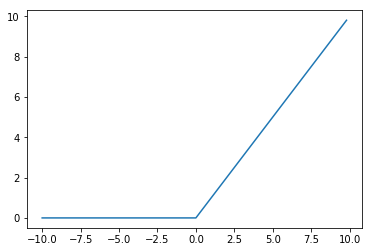

In [72]:
x = np.arange(-10., 10., 0.2)
rel = relu(x)
plt.plot(x,rel)
plt.show()

### Softmax:

\begin{equation*}
P(y=i\mid \mathbf{x}) = \frac{e^{\mathbf{x}_i}}{\sum_{k=1}^K e^{\mathbf{x}_k}}
\end{equation*}

You can find more at *https://en.wikipedia.org/wiki/Softmax_function*

In [73]:
def softmax(x):
    # Fill in softmax function
    return 0

In [74]:
testArray = np.array([-1,0.1899,0.4449,0.98990])
print(softmax(testArray))

[ 0.06311943  0.20745794  0.26771651  0.46170613]


## Logistic regression

### Hypothesis:

\begin{equation*}
h(x) = \frac {1}{1+e^{-\sum_{i=0}^K{w_i x_i}}}
\end{equation*}


In [75]:
def hypothesis(features, weights):
    # Fill in hypothesis
    return 0

### Hypothesis example:

In [76]:
features = np.array([1,2])
weights = np.array([0.05,0.2])

print(hypothesis(features, weights))

0.610639233949


### Cost function:

\begin{equation*}
J = \frac {1} {n} \sum_{i=i}^n{cost(h(X_i),Y_i)} 
\end{equation*}
\begin{equation*}
J = \frac {1} {n} \sum_{i=i}^n{[-ylog(h(x)) - (1-y)log(1 -h(x))]} 
\end{equation*}

In [77]:
def cost_function(features, weights, target):
    # Fill in cost function
    cost = 0
    return cost

### Saving and reading model from file:

In [78]:
def save_params(file_path, weights):
    np.savez(file_path, weights=weights)

def load_params(file_path):
    data = np.load(file_path)
    return data['weights']

In [79]:
weights = np.array([0.05,0.2])
save_params("testmodel.tsv", weights)
data = load_params("testmodel.tsv.npz")
print(data)

[ 0.05  0.2 ]


### Calculating metrics:

In [80]:
def train_results(targets, predictions):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Calculate tp, fp, fn, tn, p and r
    
    return TP, FP, TN, FN, P, R

In [81]:
def check_model(weights, x):
    # For a given weights and data, calculate metrics
    print("True positive count: " + str(TP))
    print("False positive count: " + str(FP))
    print("True negative count: " + str(TN))
    print("False negative count: " + str(FN))
    print("Precision: " + str(P))
    print("Recall: " + str(R))

### Data:

In [82]:
from sklearn import linear_model, datasets
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target
y = (y == 1).astype(int).T
bias = np.zeros((x.shape[0],1)) + 1
x = np.append(bias, x, axis = 1)


## Scikit example:

In [84]:
h = .02  # step size in the mesh

LR = linear_model.LogisticRegression(C=1e5)

LR.fit(x, y)

predictions = LR.predict(x)

TP, FP, TN, FN, P, R = train_results(y, predictions)
print("True positive count: " + str(TP))
print("False positive count: " + str(FP))
print("True negative count: " + str(TN))
print("False negative count: " + str(FN))
print("Precision: " + str(P))
print("Recall: " + str(R))

True positive count: 25
False positive count: 14
True negative count: 86
False negative count: 25
Precision: 0.6410256410256411
Recall: 0.5


#### Algorithm:

##### Gradient descent:

\begin{equation*}
w_i = w_i - \alpha \sum_{j=1}^n {(h(X^{(j)}) - y^{(j)}) x_i^{(j)}}
\end{equation*}


In [85]:
def logistic_regression(features, target, epochCount, learning_rate):
    n = features.shape[0]
    weights = np.zeros(features.shape[1])
    
    for step in range(epochCount):
        # Fill in algorithm
        
        # Save cost function value every so often
        if step % 100 == 0:
            costData.append(cost_function(features, weights, target))
    return weights

#### Run the algorithm:

In [86]:
costData = []
epochCount = 10000
weights = logistic_regression(x, y, epochCount = epochCount, learning_rate = 0.1)

In [87]:
print(weights)

[ 5.00935119  0.04608853 -2.46176399  1.19440017 -2.67964971]


In [88]:
print(x[80])
print(y[80])

[ 1.   5.5  2.4  3.8  1.1]
1


In [89]:
print(sigmoid(weights[0] + weights[1] * 5.5 + weights[2] * 2.4 + weights[3] * 3.8 + weights[4] * 1.1))

0.720251699537


#### Plot cost function over epochs

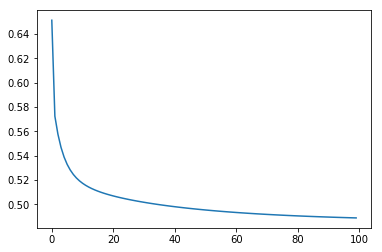

In [90]:
a = np.arange(0., epochCount/100, 1.)
plt.plot(a,costData)
plt.show()

In [92]:
check_model(weights, x)

True positive count: 24
False positive count: 13
True negative count: 87
False negative count: 26
Precision: 0.6486486486486487
Recall: 0.48


### Regularization:


#### Regularization cost: 
\begin{equation*}
J = \frac {1} {n} \sum_{i=1}^n{cost(h(X_i),Y_i)} + \frac {μ}{2n}\sum_{i=1}^n{w_i^2}
\end{equation*}
\begin{equation*}
J = \frac {1} {n} \sum_{i=i}^n{[-ylog(h(x)) - (1-y)log(1 -h(x))]} + \frac {μ}{2n}\sum_{i=1}^n{w_i^2}
\end{equation*}


In [93]:
def cost_function_reg(features, weights, target, regularization):
    # Fill in cost function that uses regularization
    cost = 0
    return cost

#### Gradient: 

\begin{equation*}
w_0 = w_0 - \alpha [\sum_{j=1}^n {(h(X^{(j)}) - y^{(j)}) x_i^{(j)}}]
\end{equation*}
\begin{equation*}
w_i = w_i - \alpha [\sum_{j=1}^n {(h(X^{(j)}) - y^{(j)}) x_i^{(j)}} + \frac {μ}{n}w_j]
\end{equation*}


In [94]:
def logistic_regression_reg(features, target, epochCount, learning_rate, regularization):
    n = features.shape[0]
    weights = np.zeros(features.shape[1])
    
    for step in range(epochCount):
        # Fill in algorithm
            
        # Save cost function value every so often
        if step % 100 == 0:
            costData.append(cost_function(features, weights, target))
    return weights

[ 5.2137611   0.0190366  -2.44861472  1.07904702 -2.37970004]


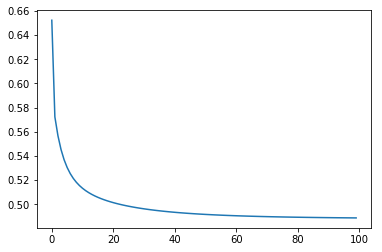

In [96]:
costData = []
epochCount = 10000
weights = logistic_regression_reg(x, y, epochCount = epochCount, learning_rate = 0.1, regularization = 0.1)
print(weights)
a = np.arange(0., epochCount/100, 1.)
plt.plot(a,costData)
plt.show()

In [97]:
check_model(weights, x)


True positive count: 23
False positive count: 12
True negative count: 88
False negative count: 27
Precision: 0.6571428571428571
Recall: 0.46
